# Assignment - 3

Author: Aditya Dey

Kaggle ID: Adiityadey

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
raw_df = pd.read_csv("train.csv").set_index("index")
test_df = pd.read_csv("test.csv").set_index("index")
print("Shape of train data: {}".format(raw_df.shape))
print("Shape of test data: {}".format(test_df.shape))

Shape of train data: (33994, 6)
Shape of test data: (11328, 5)


### Data Exploration

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33994 entries, 0 to 33993
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   nswprice   33994 non-null  float64
 1   nswdemand  33994 non-null  float64
 2   vicprice   33994 non-null  float64
 3   vicdemand  33994 non-null  float64
 4   transfer   33994 non-null  float64
 5   target     33994 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.8 MB


In [4]:
raw_df.describe()

,nswprice,nswdemand,vicprice,vicdemand,transfer,target
count,33994.000000,33994.000000,33994.000000,33994.000000,33994.000000,33994.000000
mean,0.057260,0.422004,0.003422,0.418636,0.496951,0.424604
std,0.052392,0.319866,0.010215,0.293709,0.288964,0.494290
min,-3.354880,-20.103552,-0.229600,-17.996896,-19.382464,0.000000
25%,0.035127,0.310213,0.002277,0.373123,0.414912,0.000000
50%,0.048667,0.444808,0.003467,0.422915,0.414912,0.000000
75%,0.074306,0.537303,0.003467,0.468863,0.605702,1.000000
max,0.979975,0.980809,1.000000,1.000000,1.000000,1.000000


In [5]:
raw_df.isna().sum()

nswprice     0
nswdemand    0
vicprice     0
vicdemand    0
transfer     0
target       0
dtype: int64

<AxesSubplot:>

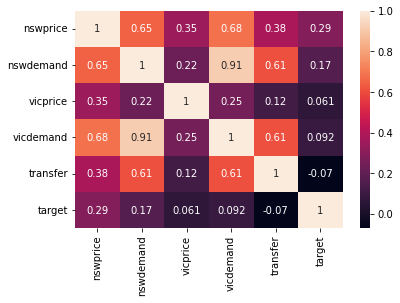

In [7]:
sns.heatmap(raw_df.corr(), annot=True)

There is a high correlation between nswdemand and vicdemand which is 0.91. We will need to proceed with further preliminary testing before deciding if we should drop either of the one columns for training model.

### Basic Model Performance Test

We will try to validate without much modification which learning model can create the best accuracy and then proceed to improve the model with highest accuracy.

In [10]:
# Standardisation
df1 = raw_df.copy()
X = df1.iloc[:, :-1].values 
y = df1.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.3)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [12]:
#Perceptron
ppn = Perceptron(eta0 = 0.001, max_iter= 1000, random_state = 1)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print("Perceptron Accuracy Score : {}".format(accuracy_score(y_test,y_pred)))

#LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print("Logistic Classifier Accuracy Score : {}".format(accuracy_score(y_test,y_pred)))

#Support Vector Machines
clf = SVC(C=1.0, kernel='linear', gamma="scale", random_state=1)
clf.fit(X_train_std,y_train)
y_pred = clf.predict(X_test_std)
print("Support Vector Classifier Accuracy Score : {}".format(accuracy_score(y_test,y_pred)))

#Decision Tree
dtree = DecisionTreeClassifier(criterion = "gini", random_state=1)
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
print("DecisionTree Classifier Accuracy Score : {}".format(accuracy_score(y_test,y_pred)))

#Random Forest
rf = RandomForestClassifier(n_estimators = 100, criterion = "gini", random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("RandomForest Classifier Accuracy Score : {}".format(accuracy_score(y_test,y_pred)))

Perceptron Accuracy Score : 0.5715266202568879
Logistic Classifier Accuracy Score : 0.7529169526424159
Support Vector Classifier Accuracy Score : 0.753897440925581
DecisionTree Classifier Accuracy Score : 0.7382096283949406
RandomForest Classifier Accuracy Score : 0.7992940484361212


Above data shows that RandomForest is the better learning model for this dataset compared to others with accuracy lower than 78%. In the next few steps we will experiment with RandomForest to increase its accuracy further.

### Training Random Forest

\textbf{Goals:}

- RandomForest are not sensitive to outliers but we will validate if performance can be increased on removing them.

- Based on experimentations with Squareroot, Cuberoot, Log transformation of data, the final prediction values were weak. Standardization of the data instead of using normal data did improve the accuracy of classifier by ~0.1%. Hence we will use Standardized data to train. Standardized data will assist in faster training since it will create slighlty lesser branches.

- Higher Estimators can lead to overfitting and very low Estimators may not provide high accuracy. Thus we will need to identify required number of estimators.





\textbf{Outliers:}

In [107]:
#Qunatile below threshold values will be removed.
Q1 = raw_df.quantile(q=0.15)
Q3 = raw_df.quantile(q=0.85)
#InterQuantileRange
IQR = Q3 - Q1

new_df = raw_df[~((raw_df <(Q1 - 1.5*IQR)) | (raw_df >(Q3 + 1.5*IQR))).any(axis=1)]
print("Outliers removed: {}".format(raw_df.shape[0] - new_df.shape[0]))

Outliers removed: 1021


\textbf{Standardization:}

In [101]:
df1 = new_df.copy()
X = df1.iloc[:, :-1].values 
y = df1.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.3)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

\textbf{Estimators:}

In [102]:
# Low Estimators
low_estimators = {}
for x in range(5,31):
    rf = RandomForestClassifier(n_estimators = x , criterion = "entropy", random_state=1) 
    rf.fit(X_train_std, y_train)
    y_pred = rf.predict(X_test_std)
    low_estimators[x] = accuracy_score(y_test,y_pred)
    
#High Estimators
high_estimators = {}
for x in range(100,501,100):
    rf = RandomForestClassifier(n_estimators = x , criterion = "entropy", random_state=1) 
    rf.fit(X_train_std, y_train)
    y_pred = rf.predict(X_test_std) 
    high_estimators[x] = accuracy_score(y_test,y_pred)

In [86]:
def get_key(val, dict1):
    for key, value in dict1.items():
         if val == value:
             return key

print("Low Estimator: {}, Accuracy Score: {}".format(get_key(max(low_estimators.values()),\
                                                             low_estimators), max(low_estimators.values())))
print("High Estimator: {}, Accuracy Score: {}".format(get_key(max(high_estimators.values()),\
                                                             high_estimators), max(high_estimators.values())))
        

Low Estimator: 28, Accuracy Score: 0.7944896558486126
High Estimator: 400, Accuracy Score: 0.8007647808608687


There is ~1% improvement in using high vs low estimator. High estimator can lead to overfitting but since the output improves performance we will use high estimator for final submission.

### Final Submission

In [111]:
#Train on the complete train.csv dataset.
df1 = raw_df.copy()
Q1 = raw_df.quantile(q=0.15)
Q3 = raw_df.quantile(q=0.85)
IQR = Q3 - Q1
new_df = raw_df[~((raw_df <(Q1 - 1.5*IQR)) | (raw_df >(Q3 + 1.5*IQR))).any(axis=1)]


X_train = df1.iloc[:, :-1].values 
y_train = df1.iloc[:, -1].values

X_test = test_df.iloc[:,:].values

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)


rf = RandomForestClassifier(n_estimators = 400 , criterion = "entropy", random_state=1) 
rf.fit(X_train_std, y_train)
y_pred = rf.predict(X_test_std)
pred_df = pd.DataFrame(y_pred, columns=(['target']))
pred_df = pred_df.reset_index()
pred_df.to_csv("Submission.csv", index = False)
#Public Score is 0.80350

### Conclusion

- Standardization provides better results than other transformation but the accuracy is not a huge improvement.
- Higher Estimators improve the accuracy yet not a huge improvement.
- Removing outliers improves the accuracry yet not a huge improvement.
- Performing above 3 goals  helped to reach ~2% better than earlier.
